# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [3]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

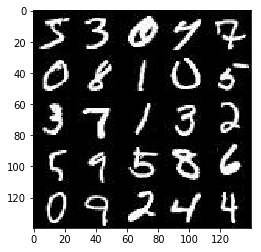

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

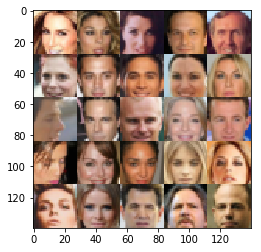

In [5]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    input_images = tf.placeholder(tf.float32, shape = [None, image_width, image_height, image_channels], name = 'input_images')
    z = tf.placeholder(tf.float32, shape = [None, z_dim], name = 'input_z')
    learning_rate = tf.placeholder(tf.float32, name = 'lr')

    return input_images, z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [10]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha = 0.1
    
    with tf.variable_scope('discriminator', reuse = reuse):
        
        x1 = tf.layers.conv2d(images, 64, 5, strides = 2, padding = 'same')
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides = 2, padding = 'same')
        x2 = tf.layers.batch_normalization(x2, training = True)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides = 2, padding = 'same')
        x3 = tf.layers.batch_normalization(x3, training = True)
        x3 = tf.maximum(alpha * x3, x3)
        
        flatten = tf.reshape(x3, (-1, 4 * 4 * 256))
        logits = tf.layers.dense(flatten, 1)
        out  = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [21]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.1
    
    with tf.variable_scope('generator', reuse = (not is_train)):
        
        x1 = tf.layers.dense(z, 7 * 7 * 256)
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides = 2, padding = 'same')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides = 2, padding = 'same')
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        x3 = tf.maximum(alpha * x3, x3)

        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides = 1, padding = 'same')
        out  = tf.tanh(logits)

    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [25]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    
    cross_entropy_d_loss_real = tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_real, labels = tf.ones_like(d_model_real) * 0.9)
    d_loss_real = tf.reduce_mean(cross_entropy_d_loss_real)
    
    cross_entropy_d_loss_fake = tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels = tf.zeros_like(d_model_fake))
    d_loss_fake = tf.reduce_mean(cross_entropy_d_loss_fake)
    
    #SUM d_loss
    d_loss = d_loss_real + d_loss_fake
    
    cross_entropy_g_loss = tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels = tf.ones_like(d_model_fake))
    g_loss = tf.reduce_mean(cross_entropy_g_loss)
    

    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [28]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    trainable_vars = tf.trainable_variables()
    discriminator_vars = [variable for variable in trainable_vars if variable.name.startswith('discriminator')]
    generator_vars = [variable for variable in trainable_vars if variable.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        discriminator_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list = discriminator_vars)
        generator_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss, var_list = generator_vars)
        
    return discriminator_opt, generator_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [29]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [33]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    # Set training data
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    out_channel_dim = data_shape[3]
    
    #Losses
    d_loss, g_loss = model_loss(input_real, input_z, out_channel_dim)
    
    #Optimizations
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    step = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                step+=1
                
                batch_images *= 2 #[-0.5, 0.5] --> [-1, 1]    
                
                # Random noise generator uses
                batch_z = np.random.uniform(-1, 1, size = (batch_size, z_dim))
                
                sess.run(d_opt, feed_dict={input_z: batch_z, input_real: batch_images})
                sess.run(g_opt, feed_dict={input_z: batch_z, lr: learning_rate, input_real:batch_images})
                sess.run(g_opt, feed_dict={input_z: batch_z, lr: learning_rate, input_real:batch_images})
                
                if step % 10 == 0:
                    loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Step: {}/{}...".format(step, epoch_i + 1), "d_loss: {:.4f}...".format(loss_d), "g_loss: {:.4f}".format(loss_g))
                
                if step % 100 == 0:
                    show_generator_output(sess, 16, input_z, out_channel_dim, data_image_mode)
        
        print("Training Finished!")
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Step: 10/1... d_loss: 1.2892... g_loss: 2.6462
Step: 20/1... d_loss: 1.5545... g_loss: 3.4889
Step: 30/1... d_loss: 1.3671... g_loss: 1.4645
Step: 40/1... d_loss: 1.3880... g_loss: 0.9416
Step: 50/1... d_loss: 1.5410... g_loss: 0.7181
Step: 60/1... d_loss: 1.4228... g_loss: 0.6086
Step: 70/1... d_loss: 1.8281... g_loss: 0.4685
Step: 80/1... d_loss: 1.4503... g_loss: 0.7540
Step: 90/1... d_loss: 1.5310... g_loss: 0.9766
Step: 100/1... d_loss: 1.4752... g_loss: 0.9981


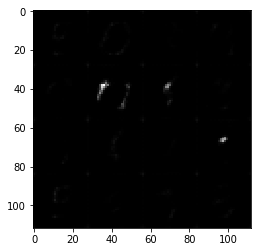

Step: 110/1... d_loss: 1.4457... g_loss: 0.6879
Step: 120/1... d_loss: 1.4384... g_loss: 0.6548
Step: 130/1... d_loss: 1.5016... g_loss: 0.5952
Step: 140/1... d_loss: 1.6387... g_loss: 0.4539
Step: 150/1... d_loss: 1.4951... g_loss: 0.8542
Step: 160/1... d_loss: 1.4763... g_loss: 0.6488
Step: 170/1... d_loss: 1.4527... g_loss: 0.6314
Step: 180/1... d_loss: 1.5707... g_loss: 0.7973
Step: 190/1... d_loss: 1.3705... g_loss: 0.9072
Step: 200/1... d_loss: 1.4696... g_loss: 0.8448


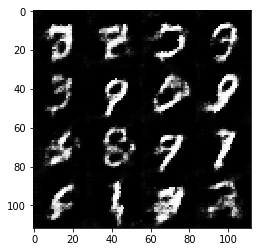

Step: 210/1... d_loss: 1.3312... g_loss: 0.9942
Step: 220/1... d_loss: 1.3966... g_loss: 0.8740
Step: 230/1... d_loss: 1.4597... g_loss: 0.7337
Step: 240/1... d_loss: 1.3858... g_loss: 0.6366
Step: 250/1... d_loss: 1.4114... g_loss: 0.9327
Step: 260/1... d_loss: 1.3552... g_loss: 0.9201
Step: 270/1... d_loss: 1.3318... g_loss: 0.8783
Step: 280/1... d_loss: 1.3233... g_loss: 0.7073
Step: 290/1... d_loss: 1.2910... g_loss: 0.8264
Step: 300/1... d_loss: 1.3562... g_loss: 0.7569


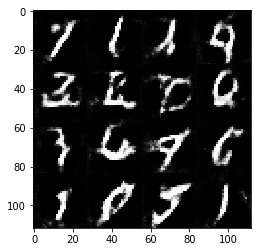

Step: 310/1... d_loss: 1.5672... g_loss: 0.4375
Step: 320/1... d_loss: 1.3981... g_loss: 0.8093
Step: 330/1... d_loss: 1.3912... g_loss: 0.8121
Step: 340/1... d_loss: 1.3819... g_loss: 1.0035
Step: 350/1... d_loss: 1.5332... g_loss: 1.2136
Step: 360/1... d_loss: 1.4743... g_loss: 0.6087
Step: 370/1... d_loss: 1.3565... g_loss: 1.0914
Step: 380/1... d_loss: 1.3165... g_loss: 0.9179
Step: 390/1... d_loss: 1.6823... g_loss: 0.3480
Step: 400/1... d_loss: 1.3205... g_loss: 0.8640


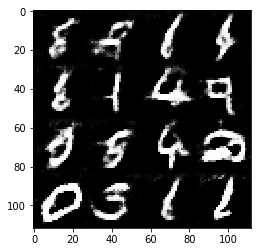

Step: 410/1... d_loss: 1.4143... g_loss: 1.1944
Step: 420/1... d_loss: 1.4046... g_loss: 0.5599
Step: 430/1... d_loss: 1.4532... g_loss: 1.4344
Step: 440/1... d_loss: 1.3485... g_loss: 0.7496
Step: 450/1... d_loss: 1.4270... g_loss: 0.5411
Step: 460/1... d_loss: 1.3701... g_loss: 0.6116
Step: 470/2... d_loss: 1.4147... g_loss: 0.9634
Step: 480/2... d_loss: 1.3524... g_loss: 0.6589
Step: 490/2... d_loss: 1.4512... g_loss: 0.5244
Step: 500/2... d_loss: 1.4173... g_loss: 0.6299


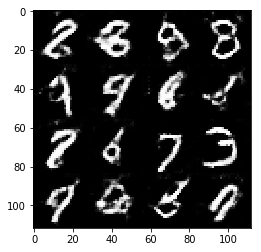

Step: 510/2... d_loss: 1.6232... g_loss: 0.3663
Step: 520/2... d_loss: 1.4948... g_loss: 0.4778
Step: 530/2... d_loss: 1.3915... g_loss: 0.6908
Step: 540/2... d_loss: 1.6037... g_loss: 0.3895
Step: 550/2... d_loss: 1.4043... g_loss: 0.7578
Step: 560/2... d_loss: 1.3267... g_loss: 0.8230
Step: 570/2... d_loss: 1.4170... g_loss: 0.6994
Step: 580/2... d_loss: 1.4253... g_loss: 1.3133
Step: 590/2... d_loss: 1.3737... g_loss: 0.8242
Step: 600/2... d_loss: 1.7171... g_loss: 0.3243


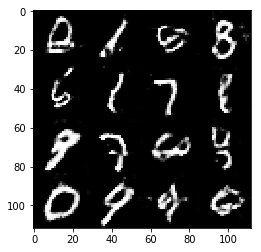

Step: 610/2... d_loss: 1.4053... g_loss: 0.6162
Step: 620/2... d_loss: 1.2792... g_loss: 0.8744
Step: 630/2... d_loss: 1.4420... g_loss: 1.1818
Step: 640/2... d_loss: 1.3784... g_loss: 0.7594
Step: 650/2... d_loss: 1.6076... g_loss: 0.3865
Step: 660/2... d_loss: 1.4585... g_loss: 0.6367
Step: 670/2... d_loss: 1.3577... g_loss: 0.8184
Step: 680/2... d_loss: 1.4027... g_loss: 0.6267
Step: 690/2... d_loss: 1.3384... g_loss: 0.8734
Step: 700/2... d_loss: 1.4768... g_loss: 1.3837


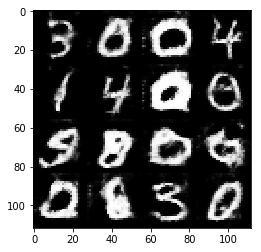

Step: 710/2... d_loss: 1.3746... g_loss: 0.5943
Step: 720/2... d_loss: 1.4944... g_loss: 0.9894
Step: 730/2... d_loss: 1.4091... g_loss: 0.7061
Step: 740/2... d_loss: 1.4131... g_loss: 0.7152
Step: 750/2... d_loss: 1.3343... g_loss: 0.6792
Step: 760/2... d_loss: 1.4186... g_loss: 1.1112
Step: 770/2... d_loss: 1.3023... g_loss: 0.9924
Step: 780/2... d_loss: 1.3834... g_loss: 0.7867
Step: 790/2... d_loss: 1.5745... g_loss: 0.4020
Step: 800/2... d_loss: 1.4272... g_loss: 0.7830


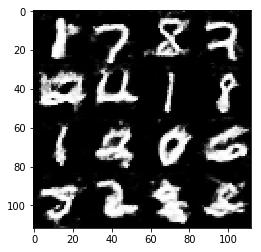

Step: 810/2... d_loss: 1.3566... g_loss: 0.7450
Step: 820/2... d_loss: 1.3707... g_loss: 0.7378
Step: 830/2... d_loss: 1.3415... g_loss: 0.7301
Step: 840/2... d_loss: 1.4403... g_loss: 1.1328
Step: 850/2... d_loss: 1.3574... g_loss: 0.7195
Step: 860/2... d_loss: 1.4521... g_loss: 0.5662
Step: 870/2... d_loss: 1.4622... g_loss: 0.5116
Step: 880/2... d_loss: 1.3539... g_loss: 0.8742
Step: 890/2... d_loss: 1.6028... g_loss: 0.4149
Step: 900/2... d_loss: 1.4746... g_loss: 0.9485


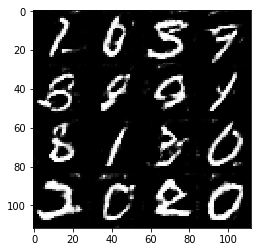

Step: 910/2... d_loss: 1.3933... g_loss: 0.6538
Step: 920/2... d_loss: 1.3823... g_loss: 1.0874
Step: 930/2... d_loss: 1.5805... g_loss: 0.3989
Training Finished!


In [34]:
batch_size = 128
z_dim = 50
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Step: 10/1... d_loss: 2.5317... g_loss: 0.2828
Step: 20/1... d_loss: 1.7478... g_loss: 0.9376
Step: 30/1... d_loss: 2.1942... g_loss: 0.4465
Step: 40/1... d_loss: 1.9219... g_loss: 0.6303
Step: 50/1... d_loss: 2.1143... g_loss: 0.4399
Step: 60/1... d_loss: 1.2548... g_loss: 1.6444
Step: 70/1... d_loss: 1.2166... g_loss: 0.9212
Step: 80/1... d_loss: 1.5864... g_loss: 0.4780
Step: 90/1... d_loss: 1.8375... g_loss: 0.5133
Step: 100/1... d_loss: 1.7028... g_loss: 0.6876


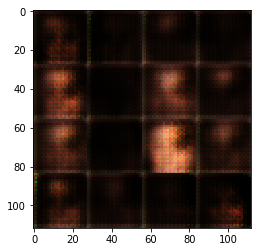

Step: 110/1... d_loss: 1.8265... g_loss: 0.8189
Step: 120/1... d_loss: 1.5891... g_loss: 0.7459
Step: 130/1... d_loss: 1.3574... g_loss: 0.8362
Step: 140/1... d_loss: 1.5164... g_loss: 0.7661
Step: 150/1... d_loss: 1.4012... g_loss: 0.7833
Step: 160/1... d_loss: 1.5410... g_loss: 0.6394
Step: 170/1... d_loss: 1.5645... g_loss: 0.7384
Step: 180/1... d_loss: 1.7436... g_loss: 0.9539
Step: 190/1... d_loss: 1.3750... g_loss: 0.7829
Step: 200/1... d_loss: 1.4799... g_loss: 1.2056


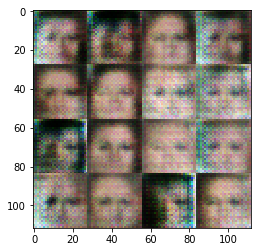

Step: 210/1... d_loss: 1.5679... g_loss: 0.6573
Step: 220/1... d_loss: 1.5134... g_loss: 0.8228
Step: 230/1... d_loss: 1.4825... g_loss: 0.6805
Step: 240/1... d_loss: 1.4219... g_loss: 0.7764
Step: 250/1... d_loss: 1.5474... g_loss: 0.7238
Step: 260/1... d_loss: 1.4636... g_loss: 0.8938
Step: 270/1... d_loss: 1.4333... g_loss: 0.9257
Step: 280/1... d_loss: 1.4983... g_loss: 0.8059
Step: 290/1... d_loss: 1.4030... g_loss: 0.7911
Step: 300/1... d_loss: 1.4025... g_loss: 0.8148


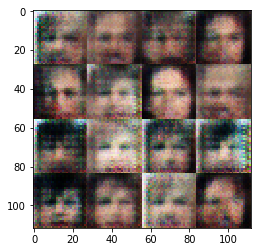

Step: 310/1... d_loss: 1.4304... g_loss: 0.7996
Step: 320/1... d_loss: 1.4147... g_loss: 0.7297
Step: 330/1... d_loss: 1.4356... g_loss: 0.7646
Step: 340/1... d_loss: 1.4338... g_loss: 0.7567
Step: 350/1... d_loss: 1.5046... g_loss: 0.8022
Step: 360/1... d_loss: 1.5076... g_loss: 0.7403
Step: 370/1... d_loss: 1.4535... g_loss: 0.7867
Step: 380/1... d_loss: 1.4920... g_loss: 0.9179
Step: 390/1... d_loss: 1.4706... g_loss: 0.6940
Step: 400/1... d_loss: 1.3625... g_loss: 0.7561


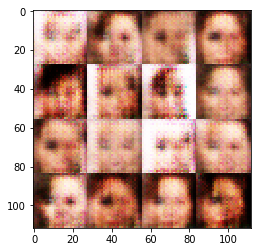

Step: 410/1... d_loss: 1.7367... g_loss: 0.6539
Step: 420/1... d_loss: 1.4287... g_loss: 0.8110
Step: 430/1... d_loss: 1.4448... g_loss: 0.8884
Step: 440/1... d_loss: 1.5051... g_loss: 0.8229
Step: 450/1... d_loss: 1.3354... g_loss: 0.8225
Step: 460/1... d_loss: 1.5490... g_loss: 0.7564
Step: 470/1... d_loss: 1.4401... g_loss: 0.7129
Step: 480/1... d_loss: 1.3940... g_loss: 0.7639
Step: 490/1... d_loss: 1.4656... g_loss: 0.7041
Step: 500/1... d_loss: 1.4344... g_loss: 0.7379


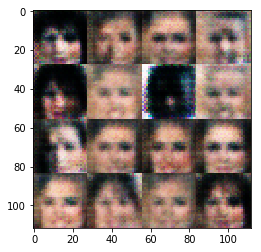

Step: 510/1... d_loss: 1.3738... g_loss: 0.8165
Step: 520/1... d_loss: 1.4644... g_loss: 0.7780
Step: 530/1... d_loss: 1.4288... g_loss: 0.8087
Step: 540/1... d_loss: 1.5040... g_loss: 0.6970
Step: 550/1... d_loss: 1.4639... g_loss: 0.7081
Step: 560/1... d_loss: 1.4495... g_loss: 0.7895
Step: 570/1... d_loss: 1.4182... g_loss: 0.7547
Step: 580/1... d_loss: 1.4023... g_loss: 0.7902
Step: 590/1... d_loss: 1.4246... g_loss: 0.7743
Step: 600/1... d_loss: 1.3973... g_loss: 0.7567


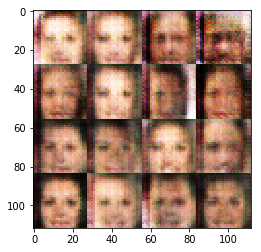

Step: 610/1... d_loss: 1.3410... g_loss: 0.7817
Step: 620/1... d_loss: 1.5799... g_loss: 0.6631
Step: 630/1... d_loss: 1.4837... g_loss: 0.8792
Step: 640/1... d_loss: 1.3824... g_loss: 0.9305
Step: 650/1... d_loss: 1.5726... g_loss: 0.7274
Step: 660/1... d_loss: 1.4802... g_loss: 0.8057
Step: 670/1... d_loss: 1.4934... g_loss: 0.8529
Step: 680/1... d_loss: 1.4641... g_loss: 0.7175
Step: 690/1... d_loss: 1.3999... g_loss: 0.8664
Step: 700/1... d_loss: 1.4413... g_loss: 0.7625


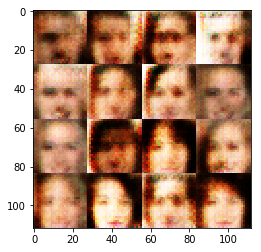

Step: 710/1... d_loss: 1.4238... g_loss: 0.6856
Step: 720/1... d_loss: 1.3851... g_loss: 0.7813
Step: 730/1... d_loss: 1.3815... g_loss: 0.8920
Step: 740/1... d_loss: 1.4446... g_loss: 0.7978
Step: 750/1... d_loss: 1.3439... g_loss: 0.8045
Step: 760/1... d_loss: 1.5100... g_loss: 0.7781
Step: 770/1... d_loss: 1.3015... g_loss: 1.0705
Step: 780/1... d_loss: 1.4092... g_loss: 0.7482
Step: 790/1... d_loss: 1.4094... g_loss: 0.6852
Step: 800/1... d_loss: 1.4055... g_loss: 0.7256


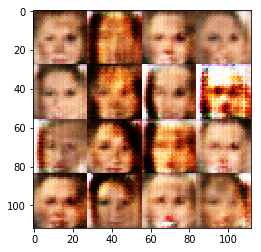

Step: 810/1... d_loss: 1.4472... g_loss: 0.7337
Step: 820/1... d_loss: 1.4443... g_loss: 0.7413
Step: 830/1... d_loss: 1.5015... g_loss: 0.6623
Step: 840/1... d_loss: 1.4776... g_loss: 0.7213
Step: 850/1... d_loss: 1.4038... g_loss: 0.7558
Step: 860/1... d_loss: 1.4014... g_loss: 0.7926
Step: 870/1... d_loss: 1.4546... g_loss: 0.7334
Step: 880/1... d_loss: 1.4229... g_loss: 0.8231
Step: 890/1... d_loss: 1.4546... g_loss: 0.7233
Step: 900/1... d_loss: 1.4593... g_loss: 0.7839


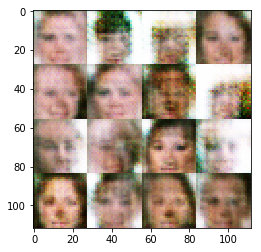

Step: 910/1... d_loss: 1.4368... g_loss: 0.8076
Step: 920/1... d_loss: 1.4867... g_loss: 0.7424
Step: 930/1... d_loss: 1.3606... g_loss: 0.8077
Step: 940/1... d_loss: 1.4704... g_loss: 1.0210
Step: 950/1... d_loss: 1.3965... g_loss: 0.8726
Step: 960/1... d_loss: 1.4306... g_loss: 0.8086
Step: 970/1... d_loss: 1.4641... g_loss: 0.7680
Step: 980/1... d_loss: 1.3758... g_loss: 0.8106
Step: 990/1... d_loss: 1.5630... g_loss: 0.7753
Step: 1000/1... d_loss: 1.3919... g_loss: 0.7850


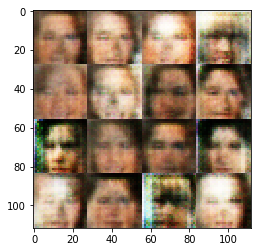

Step: 1010/1... d_loss: 1.4379... g_loss: 0.7310
Step: 1020/1... d_loss: 1.3296... g_loss: 0.8039
Step: 1030/1... d_loss: 1.4581... g_loss: 0.8780
Step: 1040/1... d_loss: 1.4503... g_loss: 0.7853
Step: 1050/1... d_loss: 1.4518... g_loss: 0.6204
Step: 1060/1... d_loss: 1.4236... g_loss: 0.8692
Step: 1070/1... d_loss: 1.3657... g_loss: 0.9608
Step: 1080/1... d_loss: 1.3994... g_loss: 0.8448
Step: 1090/1... d_loss: 1.4963... g_loss: 0.7587
Step: 1100/1... d_loss: 1.4215... g_loss: 0.7959


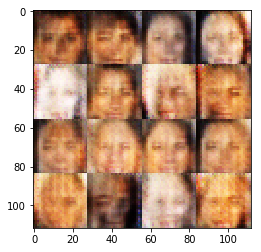

Step: 1110/1... d_loss: 1.4480... g_loss: 0.7977
Step: 1120/1... d_loss: 1.3933... g_loss: 0.8799
Step: 1130/1... d_loss: 1.4296... g_loss: 0.8516
Step: 1140/1... d_loss: 1.3931... g_loss: 0.7741
Step: 1150/1... d_loss: 1.4174... g_loss: 0.7583
Step: 1160/1... d_loss: 1.4280... g_loss: 0.7552
Step: 1170/1... d_loss: 1.4433... g_loss: 0.7972
Step: 1180/1... d_loss: 1.4325... g_loss: 0.6559
Step: 1190/1... d_loss: 1.4740... g_loss: 0.8319
Step: 1200/1... d_loss: 1.4227... g_loss: 0.9010


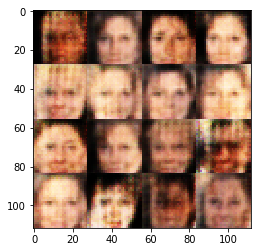

Step: 1210/1... d_loss: 1.4112... g_loss: 0.7905
Step: 1220/1... d_loss: 1.4160... g_loss: 0.9106
Step: 1230/1... d_loss: 1.4033... g_loss: 0.8720
Step: 1240/1... d_loss: 1.3970... g_loss: 0.7900
Step: 1250/1... d_loss: 1.4070... g_loss: 0.7442
Step: 1260/1... d_loss: 1.3804... g_loss: 0.9091
Step: 1270/1... d_loss: 1.4105... g_loss: 0.7992
Step: 1280/1... d_loss: 1.4627... g_loss: 0.6728
Step: 1290/1... d_loss: 1.4538... g_loss: 0.7821
Step: 1300/1... d_loss: 1.3679... g_loss: 0.6846


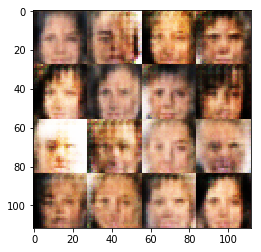

Step: 1310/1... d_loss: 1.4123... g_loss: 0.7906
Step: 1320/1... d_loss: 1.3268... g_loss: 0.8034
Step: 1330/1... d_loss: 1.4290... g_loss: 0.7036
Step: 1340/1... d_loss: 1.3765... g_loss: 0.8562
Step: 1350/1... d_loss: 1.3974... g_loss: 0.7415
Step: 1360/1... d_loss: 1.4179... g_loss: 0.8157
Step: 1370/1... d_loss: 1.4107... g_loss: 0.8274
Step: 1380/1... d_loss: 1.3590... g_loss: 0.7008
Step: 1390/1... d_loss: 1.4195... g_loss: 0.7180
Step: 1400/1... d_loss: 1.4294... g_loss: 0.7409


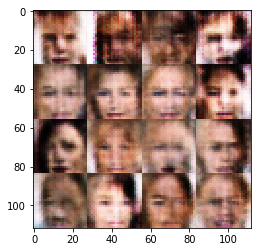

Step: 1410/1... d_loss: 1.4121... g_loss: 0.9516
Step: 1420/1... d_loss: 1.4227... g_loss: 0.8072
Step: 1430/1... d_loss: 1.3966... g_loss: 0.7325
Step: 1440/1... d_loss: 1.4090... g_loss: 1.0296
Step: 1450/1... d_loss: 1.3730... g_loss: 0.8384
Step: 1460/1... d_loss: 1.3949... g_loss: 0.8224
Step: 1470/1... d_loss: 1.4660... g_loss: 0.6608
Step: 1480/1... d_loss: 1.3836... g_loss: 0.8318
Step: 1490/1... d_loss: 1.4629... g_loss: 0.8173
Step: 1500/1... d_loss: 1.4095... g_loss: 0.7942


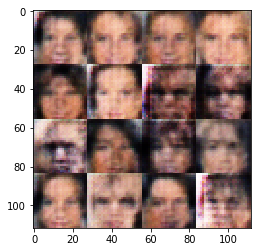

Step: 1510/1... d_loss: 1.3864... g_loss: 0.7278
Step: 1520/1... d_loss: 1.4176... g_loss: 0.7973
Step: 1530/1... d_loss: 1.3597... g_loss: 0.9086
Step: 1540/1... d_loss: 1.3860... g_loss: 0.7615
Step: 1550/1... d_loss: 1.4338... g_loss: 0.7711
Step: 1560/1... d_loss: 1.4445... g_loss: 0.7622
Step: 1570/1... d_loss: 1.4452... g_loss: 0.6368
Step: 1580/1... d_loss: 1.3832... g_loss: 0.7623
Step: 1590/1... d_loss: 1.4595... g_loss: 0.8275
Step: 1600/1... d_loss: 1.4490... g_loss: 0.8209


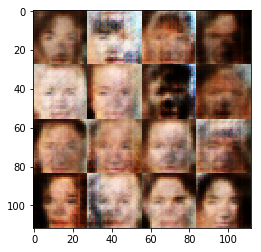

Step: 1610/1... d_loss: 1.4499... g_loss: 0.8320
Step: 1620/1... d_loss: 1.4081... g_loss: 0.7300
Step: 1630/1... d_loss: 1.4127... g_loss: 0.9729
Step: 1640/1... d_loss: 1.3945... g_loss: 0.7779
Step: 1650/1... d_loss: 1.4462... g_loss: 0.7435
Step: 1660/1... d_loss: 1.4640... g_loss: 0.9084
Step: 1670/1... d_loss: 1.3769... g_loss: 0.8147
Step: 1680/1... d_loss: 1.3696... g_loss: 0.6813
Step: 1690/1... d_loss: 1.3897... g_loss: 0.8124
Step: 1700/1... d_loss: 1.4433... g_loss: 0.6717


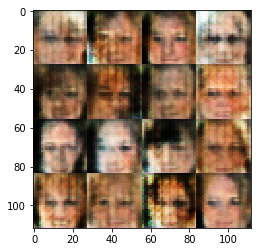

Step: 1710/1... d_loss: 1.6353... g_loss: 0.8536
Step: 1720/1... d_loss: 1.4446... g_loss: 0.7723
Step: 1730/1... d_loss: 1.3783... g_loss: 0.7651
Step: 1740/1... d_loss: 1.3967... g_loss: 0.7831
Step: 1750/1... d_loss: 1.4310... g_loss: 0.8460
Step: 1760/1... d_loss: 1.4082... g_loss: 0.7450
Step: 1770/1... d_loss: 1.4681... g_loss: 0.6848
Step: 1780/1... d_loss: 1.4104... g_loss: 0.7338
Step: 1790/1... d_loss: 1.3720... g_loss: 0.8958
Step: 1800/1... d_loss: 1.4250... g_loss: 0.7136


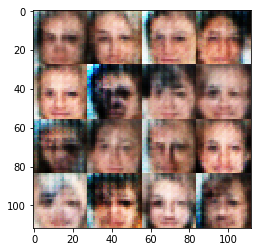

Step: 1810/1... d_loss: 1.4316... g_loss: 0.8176
Step: 1820/1... d_loss: 1.4448... g_loss: 0.7704
Step: 1830/1... d_loss: 1.3876... g_loss: 0.8184
Step: 1840/1... d_loss: 1.4037... g_loss: 0.8733
Step: 1850/1... d_loss: 1.3811... g_loss: 0.7457
Step: 1860/1... d_loss: 1.4259... g_loss: 0.7141
Step: 1870/1... d_loss: 1.3261... g_loss: 0.9554
Step: 1880/1... d_loss: 1.4219... g_loss: 0.8125
Step: 1890/1... d_loss: 1.4204... g_loss: 0.8324
Step: 1900/1... d_loss: 1.4213... g_loss: 0.7711


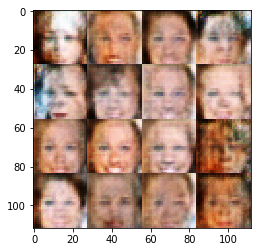

Step: 1910/1... d_loss: 1.3469... g_loss: 0.9072
Step: 1920/1... d_loss: 1.4057... g_loss: 0.6992
Step: 1930/1... d_loss: 1.4594... g_loss: 0.8156
Step: 1940/1... d_loss: 1.4097... g_loss: 0.7570
Step: 1950/1... d_loss: 1.4289... g_loss: 0.7739
Step: 1960/1... d_loss: 1.4056... g_loss: 0.8640
Step: 1970/1... d_loss: 1.4177... g_loss: 0.8439
Step: 1980/1... d_loss: 1.4069... g_loss: 0.7467
Step: 1990/1... d_loss: 1.3418... g_loss: 0.7581
Step: 2000/1... d_loss: 1.4237... g_loss: 0.8426


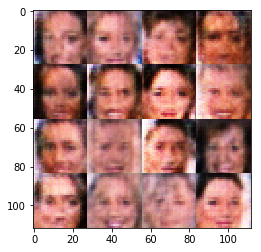

Step: 2010/1... d_loss: 1.4505... g_loss: 0.7829
Step: 2020/1... d_loss: 1.4040... g_loss: 0.8767
Step: 2030/1... d_loss: 1.3683... g_loss: 0.8189
Step: 2040/1... d_loss: 1.4011... g_loss: 0.7815
Step: 2050/1... d_loss: 1.3898... g_loss: 0.7985
Step: 2060/1... d_loss: 1.3824... g_loss: 0.8886
Step: 2070/1... d_loss: 1.3664... g_loss: 0.6800
Step: 2080/1... d_loss: 1.3982... g_loss: 0.8723
Step: 2090/1... d_loss: 1.4061... g_loss: 0.8604
Step: 2100/1... d_loss: 1.4204... g_loss: 0.8505


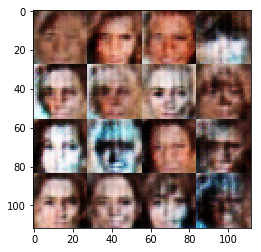

Step: 2110/1... d_loss: 1.3545... g_loss: 0.7942
Step: 2120/1... d_loss: 1.4493... g_loss: 0.7208
Step: 2130/1... d_loss: 1.3586... g_loss: 0.7680
Step: 2140/1... d_loss: 1.3430... g_loss: 0.8401
Step: 2150/1... d_loss: 1.4247... g_loss: 0.7563
Step: 2160/1... d_loss: 1.3853... g_loss: 0.8107
Step: 2170/1... d_loss: 1.3816... g_loss: 0.8079
Step: 2180/1... d_loss: 1.4007... g_loss: 0.7049
Step: 2190/1... d_loss: 1.3923... g_loss: 0.7416
Step: 2200/1... d_loss: 1.4201... g_loss: 0.6877


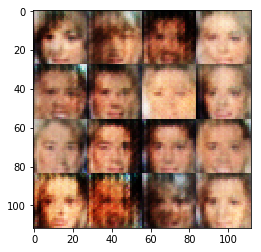

Step: 2210/1... d_loss: 1.3808... g_loss: 0.8620
Step: 2220/1... d_loss: 1.4049... g_loss: 0.7855
Step: 2230/1... d_loss: 1.4277... g_loss: 0.6305
Step: 2240/1... d_loss: 1.3961... g_loss: 0.8668
Step: 2250/1... d_loss: 1.3920... g_loss: 0.9122
Step: 2260/1... d_loss: 1.3901... g_loss: 0.7919
Step: 2270/1... d_loss: 1.3990... g_loss: 0.7381
Step: 2280/1... d_loss: 1.4213... g_loss: 0.6846
Step: 2290/1... d_loss: 1.4008... g_loss: 0.9039
Step: 2300/1... d_loss: 1.4543... g_loss: 0.8366


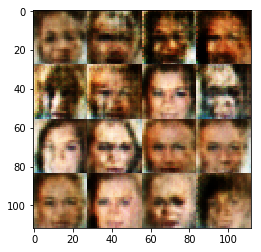

Step: 2310/1... d_loss: 1.3980... g_loss: 0.7843
Step: 2320/1... d_loss: 1.4052... g_loss: 0.7698
Step: 2330/1... d_loss: 1.4122... g_loss: 0.8173
Step: 2340/1... d_loss: 1.4172... g_loss: 0.6815
Step: 2350/1... d_loss: 1.3844... g_loss: 0.7390
Step: 2360/1... d_loss: 1.3672... g_loss: 0.8081
Step: 2370/1... d_loss: 1.4285... g_loss: 0.7489
Step: 2380/1... d_loss: 1.3856... g_loss: 0.8514
Step: 2390/1... d_loss: 1.4078... g_loss: 0.7288
Step: 2400/1... d_loss: 1.4410... g_loss: 0.8135


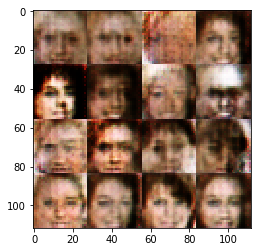

Step: 2410/1... d_loss: 1.3827... g_loss: 0.7685
Step: 2420/1... d_loss: 1.4207... g_loss: 0.7325


KeyboardInterrupt: 

In [35]:
batch_size = 64
z_dim = 30
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.